# i. Perkenalan
Nama: Timothy
Batch: FTDS-011
Dataset: telcom_customer_churn
Objective: Memprediksi Customer Churn untuk sebuah perusahaan telekomunikasi

# ii. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout, Activation
from sklearn.metrics import classification_report
import pickle
!pip install -q -U keras-tuner
import keras_tuner as kt
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

     |████████████████████████████████| 133 kB 14.7 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.


# iii. Data Loading
Data diambil dari Kaggle

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# iv. Exploratory Data Analysis (EDA)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Feature Info
1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. 
Demographic info about customers – gender, age range, and if they have partners and dependents



In [ ]:
## Turn Churn feature into number
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [ ]:
## Turn TotalCharges Feature into float and drop n/a
df['TotalCharges'].replace(to_replace = ' ', value= np.nan, inplace = True)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.dropna(axis=0, inplace=True)

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tidak ada missing values pada Dataset

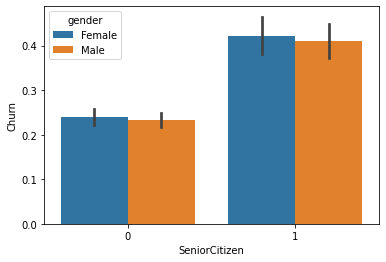

In [ ]:
sns.barplot(x="SeniorCitizen",y="Churn",hue="gender",data=df)

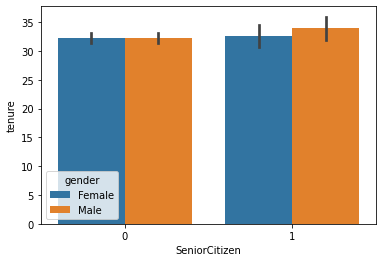

In [ ]:
sns.barplot(x="SeniorCitizen",y="tenure",hue="gender",data=df)

Jangkat waktu berlangganan customer senior citizen dengan yang tidak senior kurang lebih sama

Melalui figur atau barplot diatas dapat disimpulkan bahwa female senior citizen lebih cenderung untuk Churn

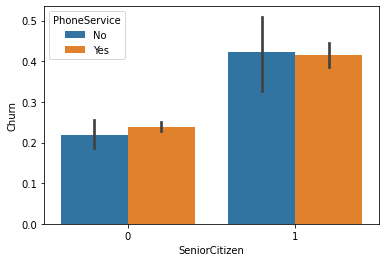

In [ ]:
sns.barplot(x="SeniorCitizen",y="Churn",hue="PhoneService",data=df)

Hal tersebut juga berlaku terhadap layanan telfon

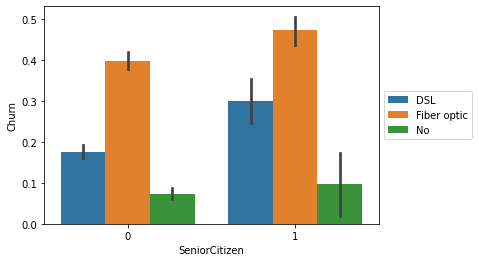

In [ ]:
sns.barplot(x="SeniorCitizen",y="Churn",hue="InternetService",data=df)
plt.legend(loc='center left', bbox_to_anchor=(1.00, 0.5), ncol=1)

Melalui barplot diatas dapat terlihat bahwa layanan telcom dengan churn tertinggi adalah layanan internet Fiber Optic

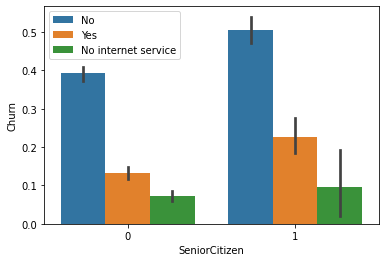

In [ ]:
sns.barplot(x="SeniorCitizen",y="Churn",hue="OnlineSecurity",data=df)
plt.legend(loc='upper left')

Banyak customer yang tidak memiliki Online Security

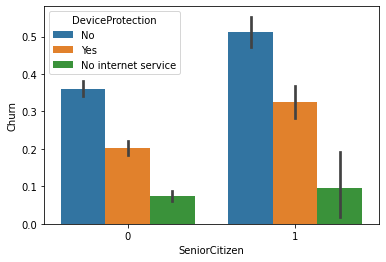

In [ ]:
sns.barplot(x="SeniorCitizen",y="Churn",hue="DeviceProtection",data=df)

Begitu juga dengan Device Protection

Dapat saya simpulkan, sebagian besar customer Telcom belum memiliki kesadaran yang tinggi terhadap keamanan jaringan maupun hardwarenya; Layanan internet yang kurang disukai adalah layanan internet fiber optic; Dalam tahun tersebut banyak customer yang sudah lanjut usia atau senior citizen yang berhenti berlangganan

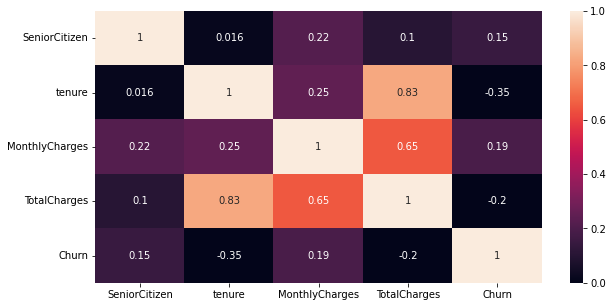

In [ ]:
corr = df.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

Melalui heatmap dapat terlihat feature dengan korelasi tertinggi dengan target (churn) adalah Senior Citizen dan Monthly Charges

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


# v. Data Preprocessing

In [ ]:
## Remove customer ID
df.drop(['customerID'], axis=1, inplace=True)

## Mengubah object menjadi number/binary

In [ ]:
df['Partner'].replace(to_replace='Yes', value=1, inplace=True)
df['Partner'].replace(to_replace='No',  value=0, inplace=True)

In [ ]:
df['Dependents'].replace(to_replace='Yes', value=1, inplace=True)
df['Dependents'].replace(to_replace='No',  value=0, inplace=True)

In [ ]:
df['PhoneService'].replace(to_replace='Yes', value=1, inplace=True)
df['PhoneService'].replace(to_replace='No',  value=0, inplace=True)

In [ ]:
df['PaperlessBilling'].replace(to_replace='Yes', value=1, inplace=True)
df['PaperlessBilling'].replace(to_replace='No',  value=0, inplace=True)

## Splitting Dataset

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test =   train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape)

(5625, 19) (1407, 19)


## Distribution Check

In [ ]:
def diagnostic_plots(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()

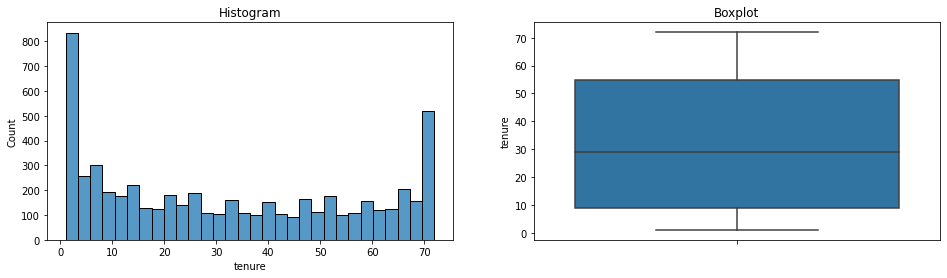


Skewness Value :  0.24201466166359398


In [ ]:
diagnostic_plots(X_train, 'tenure')
print('\nSkewness Value : ', X_train['tenure'].skew())

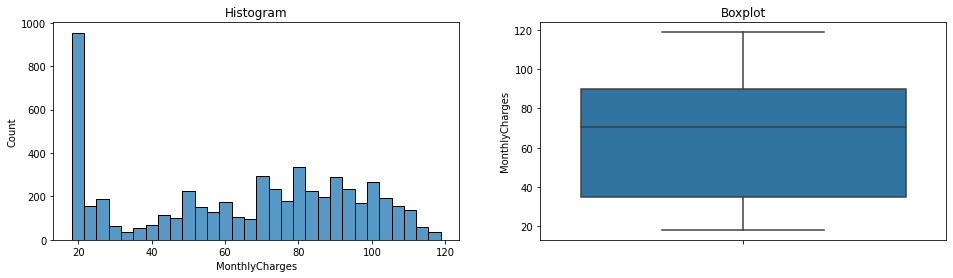


Skewness Value :  -0.21790770281925442


In [ ]:
diagnostic_plots(X_train, 'MonthlyCharges')
print('\nSkewness Value : ', X_train['MonthlyCharges'].skew())

Tenure dan MonthlyCharges adalah 2 feature numerical dari X_train dan keduanya terdistribusi normal

In [ ]:
## Splitting Dataset untuk mendapatkan X_val dan y_val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

## Feature Engineering
num_col adalah feature dengan nilai numerikal yang akan diproses menggunakan Standard Scaler
cat_col adalah feature kategorical yang perlu di encode menggunakan OneHotEncoder

In [ ]:
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_col = ['PaymentMethod', 'Contract', 'InternetService']

num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_col),
    ('pipe_cat', cat_pipeline, cat_col)
])

In [ ]:
X_train = data_pipeline.fit_transform(X_train)
X_val = data_pipeline.transform(X_val)
X_test = data_pipeline.transform(X_test)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

input_shape = X_train.shape[1]

## Buat Arsitektur ANN (Sequential)

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=input_shape, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))



model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Notes:

1. binary_crossentropy: Used as a loss function for binary classification model. The binary_crossentropy function computes the cross-entropy loss between true labels and predicted labels.
2. Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".
3. The term kernel_initializer is a fancy term for which statistical distribution or function to use for initialising the weights. In case of statistical distribution, the library will generate numbers from that statistical distribution and use as starting weights.


## Functional API

In [ ]:
inputs = keras.Input(input_shape)
Layer_1 = Dense(128, activation="relu")(inputs)
Layer_1 = Dropout(0.7)(Layer_1)
Layer_2 = Dense(64, activation="relu")(Layer_1)
Layer_2 = Dropout(0.5)(Layer_2)
Layer_3 = Dense(32, activation="relu")(Layer_2)
Layer_3 = Dropout(0.5)(Layer_3) 
output_layer= Dense(1, activation="sigmoid")(Layer_3)

model2 = Model(inputs=inputs, outputs=output_layer)

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
159/159 [==============================] - 2s 5ms/step - loss: 0.5355 - accuracy: 0.7317 - val_loss: 0.4668 - val_accuracy: 0.7691
Epoch 2/100
159/159 [==============================] - 1s 5ms/step - loss: 0.4721 - accuracy: 0.7631 - val_loss: 0.4505 - val_accuracy: 0.7691
Epoch 3/100
159/159 [==============================] - 1s 5ms/step - loss: 0.4635 - accuracy: 0.7667 - val_loss: 0.4537 - val_accuracy: 0.7655
Epoch 4/100
159/159 [==============================] - 1s 6ms/step - loss: 0.4561 - accuracy: 0.7720 - val_loss: 0.4500 - val_accuracy: 0.7709
Epoch 5/100
159/159 [==============================] - 1s 5ms/step - loss: 0.4517 - accuracy: 0.7801 - val_loss: 0.4482 - val_accuracy: 0.7780
Epoch 6/100
159/159 [==============================] - 1s 6ms/step - loss: 0.4503 - accuracy: 0.7803 - val_loss: 0.4457 - val_accuracy: 0.7869
Epoch 7/100
159/159 [==============================] - 1s 5ms/step - loss: 0.4500 - accuracy: 0.7835 - val_loss: 0.4458 - val_accuracy: 0.7922

# vii. Model Training

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
159/159 [==============================] - 1s 4ms/step - loss: 0.5097 - accuracy: 0.7327 - val_loss: 0.4597 - val_accuracy: 0.7691
Epoch 2/100
159/159 [==============================] - 0s 3ms/step - loss: 0.4490 - accuracy: 0.7809 - val_loss: 0.4472 - val_accuracy: 0.7691
Epoch 3/100
159/159 [==============================] - 0s 3ms/step - loss: 0.4422 - accuracy: 0.7857 - val_loss: 0.4469 - val_accuracy: 0.7833
Epoch 4/100
159/159 [==============================] - 0s 3ms/step - loss: 0.4461 - accuracy: 0.7843 - val_loss: 0.4430 - val_accuracy: 0.7851
Epoch 5/100
159/159 [==============================] - 0s 3ms/step - loss: 0.4412 - accuracy: 0.7902 - val_loss: 0.4441 - val_accuracy: 0.7780
Epoch 6/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.7908 - val_loss: 0.4397 - val_accuracy: 0.7798
Epoch 7/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.7944 - val_loss: 0.4401 - val_accuracy: 0.7886

# viii. Model Evaluation

In [ ]:
metrics = pd.DataFrame(history.history)
metrics.tail()

,loss,accuracy,val_loss,val_accuracy
95,0.421931,0.799684,0.431255,0.785080
96,0.421137,0.802450,0.431308,0.777975
97,0.414664,0.802252,0.430594,0.783304
98,0.417917,0.798696,0.433143,0.785080
99,0.419244,0.803240,0.433540,0.776199


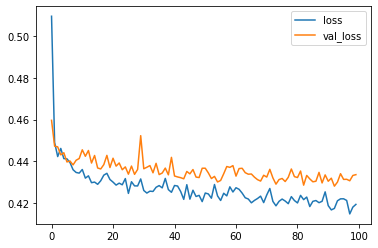

In [ ]:
metrics[['loss', 'val_loss']].plot();

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



Keakuratan prediksi 78% dari 1407 values, precision dan recall tingkat akurat lebih tinggi memprediksi customer yang tidak churn, dalam case ini model ini masih relevan atau bisa digunakan karena recall score tertinggi terhadap customer yang tidak churn dapat meyakinkan perusahaan telcom bahwa bisnis yang dijalankan masih sustainable atau dapat bertahan lama, dengan asumsi naive kalau customer yang churn lebih memiliki potensi untuk tidak churn

## Model Improvement Menggunakan Keras Tuner Random Search

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 30)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=600,
                                            step=64),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project1',
    project_name='Churn')

In [ ]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_val, y_val))

Trial 5 Complete [00h 01m 50s]
val_accuracy: 0.7856719891230265

Best val_accuracy So Far: 0.7880402604738871
Total elapsed time: 00h 04m 45s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in project1/Churn
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 4
units_0: 160
units_1: 544
learning_rate: 0.001
units_2: 224
units_3: 480
units_4: 480
units_5: 96
units_6: 160
units_7: 288
units_8: 96
units_9: 288
units_10: 416
units_11: 160
units_12: 480
units_13: 96
units_14: 288
units_15: 96
units_16: 160
units_17: 96
units_18: 288
units_19: 544
units_20: 352
units_21: 480
units_22: 224
units_23: 160
units_24: 224
units_25: 288
units_26: 96
units_27: 352
units_28: 96
Score: 0.7880402604738871
Trial summary
Hyperparameters:
num_layers: 29
units_0: 544
units_1: 544
learning_rate: 0.0001
units_2: 160
units_3: 96
units_4: 160
units_5: 544
units_6: 480
units_7: 288
units_8: 32
units_9: 160
units_10: 544
units_11: 480
units_12: 160
units_13: 416
units_14: 544
units_15: 352
units_16: 96
units_17: 352
units_18: 32
units_19: 544
units_20: 544
units_21: 352
units_22: 32
units_23: 544
units_24: 352
units_25: 352
units_26: 224
units_27: 288
units_28:

Dengan Keras Tuner accuracy hanya bertambah 1% dari 78% menjadi 79% namun hal ini dapat ditingkatkan dengan diberlakukan experimen experimen lagi

# ix. Model Saving

In [ ]:
with open("pipeline.pkl", "wb") as pipe_file:
  pickle.dump(data_pipeline, pipe_file)

In [ ]:
model.save("nn_ChurnRate")

INFO:tensorflow:Assets written to: nn_ChurnRate/assets


# x. Model Inference

In [ ]:
data_inf= df.sample(2000, random_state=42)

In [ ]:
Xi = data_inf.drop('Churn', axis=1)
yi = data_inf['Churn']

Xi_train, Xi_test, yi_train, yi_test =   train_test_split(Xi, yi, test_size=0.20, random_state=42)
Xi_train, Xi_val, yi_train, yi_val = train_test_split(Xi_train, yi_train, test_size=0.1, random_state=42)

In [ ]:
Xi_train = data_pipeline.fit_transform(Xi_train)
Xi_val = data_pipeline.transform(Xi_val)
Xi_test = data_pipeline.transform(Xi_test)

In [ ]:
historyi = model.fit(Xi_train, yi_train, epochs=100, validation_data=(Xi_val, yi_val))

Epoch 1/100
45/45 [==============================] - 1s 7ms/step - loss: 0.4689 - accuracy: 0.7646 - val_loss: 0.3510 - val_accuracy: 0.8375
Epoch 2/100
45/45 [==============================] - 0s 3ms/step - loss: 0.4569 - accuracy: 0.7708 - val_loss: 0.3469 - val_accuracy: 0.8375
Epoch 3/100
45/45 [==============================] - 0s 4ms/step - loss: 0.4584 - accuracy: 0.7840 - val_loss: 0.3488 - val_accuracy: 0.8375
Epoch 4/100
45/45 [==============================] - 0s 4ms/step - loss: 0.4569 - accuracy: 0.7667 - val_loss: 0.3491 - val_accuracy: 0.8375
Epoch 5/100
45/45 [==============================] - 0s 4ms/step - loss: 0.4607 - accuracy: 0.7757 - val_loss: 0.3504 - val_accuracy: 0.8250
Epoch 6/100
45/45 [==============================] - 0s 4ms/step - loss: 0.4573 - accuracy: 0.7736 - val_loss: 0.3492 - val_accuracy: 0.8313
Epoch 7/100
45/45 [==============================] - 0s 4ms/step - loss: 0.4565 - accuracy: 0.7757 - val_loss: 0.3487 - val_accuracy: 0.8250
Epoch 8/100
4

In [ ]:
yi_pred = model.predict(Xi_test)
yi_pred = np.where(yi_pred >= 0.5, 1, 0)
print(classification_report(yi_test, yi_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       300
           1       0.61      0.53      0.57       100

    accuracy                           0.80       400
   macro avg       0.73      0.71      0.72       400
weighted avg       0.79      0.80      0.79       400



# xi. Pengambilan Keputusan
Dengan evaluasi kalau tingkat akurasi terhadap customer yang tidak Churn lebih tinggi yaitu >80% dengan model ini saya dapat meyakinkan ke perusahaan Telcom bahwa bisnis yang dijalankan perusahaan cukup sustainable namun perlu digaris bawahi kalau hal tersebut dengan asumsi naive kalau potensi customer untuk churn atau berhenti berlangganan cukup kecil. 

Perusahaan perlu mencari tahu apa yang menyebabkan customer lansia atau senior berhenti berlangganan pada tahun itu terutama oleh segmen yang menggunakan fiber optic, apakah ada perubahan kualitas layanan, kurangnya sosialisasi produk, atau apakah ada hal lain yang menyebabkan customer lansia berhenti berlangganan, mungkin juga dapat disebabkan oleh kurangnya kesadaran customer terhadap keamanan hardware maupun jaringan

# Referensi:
* https://www.kaggle.com/code/mragpavank/predicting-customer-churn-for-a-telecom-company#Building-the-ANN-Model
* https://colab.research.google.com/drive/1lKpwI0-NW22KhgummSVdHIVfHt2N0MOK?usp=sharing#scrollTo=bWeJM4i35kAD
* https://www.tensorflow.org/
* https://datascience.stackexchange.com/questions/37378/what-are-kernel-initializers-and-what-is-their-significance
* https://www.kaggle.com/code/anuragupadhyay6212/customer-churn-prediction-with-keras-tuner#Keras-Tuner
* https://www.analyticsvidhya.com/blog/2021/07/understanding-sequential-vs-functional-api-in-keras/

